# Using ColumnDefinition

You can style a column by providing a `ColumnDefinition` and providing it to the table argument

```python
    from plottable import ColumnDefinition

    Table(df, column_definitions: List[ColumnDefinition]=None)
``` 

when instantiating the Table.

You can also use the alias ColDef

```python
    from plottable import ColDef
```

```python
class ColumnDefinition:
    """A Class defining attributes for a table column.

    Attributes:
        name: str:
            the column name
        title: str = None:
            the plotted title to override the column name
        width: float = 1:
            the width of the column as a factor of the default width
        textprops: Dict[str, Any] = field(default_factory=dict)
            textprops provided to each textcell
        formatter: Callable = None:
            A Callable to format the appearance of the texts
        cmap: Callable = None:
            A Callable that returns a color based on the cells value.
        text_cmap: Callable = None:
            A Callable that returns a color based on the cells value.
        group: str = None:
            Each group will get a spanner column label above the column labels.
        plot_fn: Callable = None
            A Callable that will take the cells value as input and create a subplot
            on top of each cell and plot onto them.
            To pass additional arguments to it, use plot_kw (see below).
        plot_kw: Dict[str, Any] = field(default_factory=dict)
            Additional keywords provided to plot_fn.
        border: str | List = None:
            Plots a vertical borderline.
            can be either "left" / "l", "right" / "r" or "both"
    """


```

## Setting Column Titles

You can choose a different title for your Column with the `title` argument.

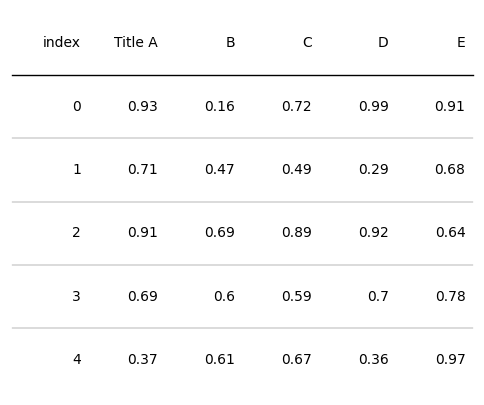

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plottable import ColumnDefinition, ColDef, Table

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColumnDefinition(name="A", title="Title A")])

plt.show()

## Setting Column Widths

You can provide a `width (float)` argument to a ColumnDefinition. It's the width as a factor of the default column width.  
By default column widths are calculated by dividing the width of the axes into n_columns same widths.

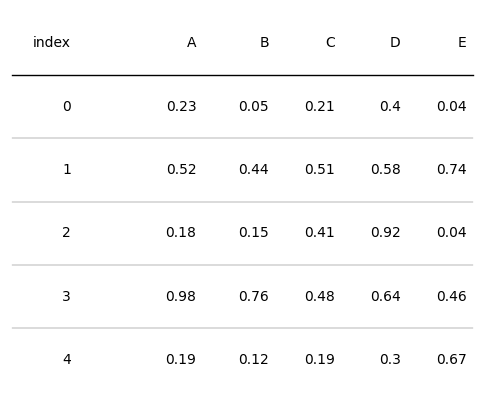

In [3]:
d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColumnDefinition(name="A", width=2)])

plt.show()

## Setting Column Textprops

You can provide a `textprops (Dict[str: Any])` argument to a ColumnDefinition to adjust the font attributes.

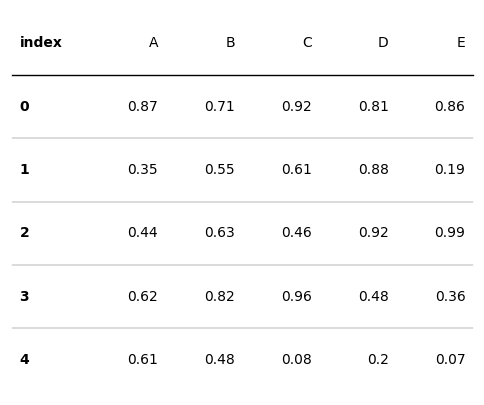

In [4]:
d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColumnDefinition(name="index", textprops={"ha": "left", "weight": "bold"})])

plt.show()

## Providing a Text Formatter

By providing a `formatter (Callable)` to a ColumnDefinition you can adjust the appearance of the plotted cell texts.

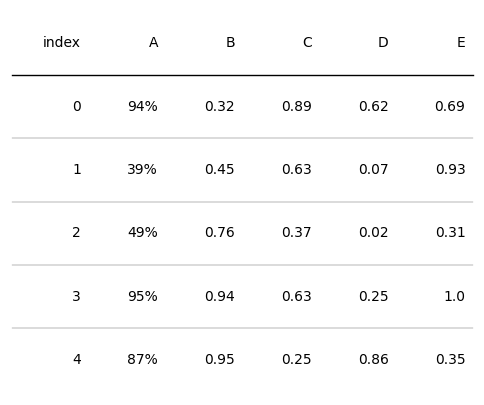

In [5]:
from plottable.formatters import decimal_to_percent

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColumnDefinition(name="A", formatter=decimal_to_percent)])

plt.show()

## Providing a cmap function

By providing a `cmap (Callable)` to a ColumnDefinition you can adjust the appearance of the cell backgrounds based on the cells value.

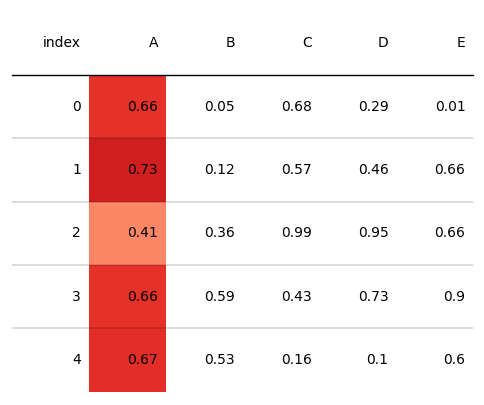

In [6]:
from plottable.cmap import normed_cmap
import matplotlib.cm


d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))

# A列背景使用格式, 在 matplotlib 中，cmap=matplotlib.cm.Reds 用于指定颜色映射（colormap），以不同的颜色代表数据的数值范围。
tab = Table(d, column_definitions=[ColumnDefinition(name="A", cmap=matplotlib.cm.Reds)])

plt.show()

## Providing a text_cmap function

By providing a `text_cmap (Callable)` to a ColumnDefinition you can adjust the color of the plotted cell texts based on the cells value.

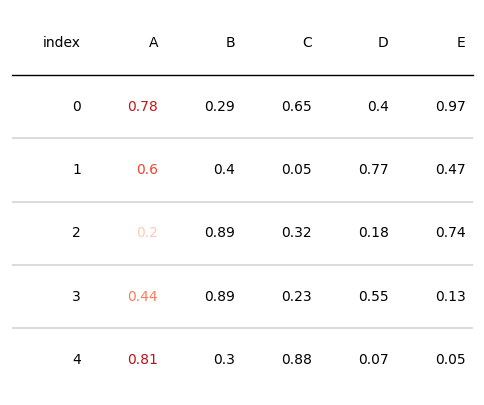

In [7]:
from plottable.cmap import normed_cmap
import matplotlib.cm


d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))

# A列内容使用格式, 在 matplotlib 中，cmap=matplotlib.cm.Reds 用于指定颜色映射（colormap），以不同的颜色代表数据的数值范围。
tab = Table(d, column_definitions=[ColumnDefinition(name="A", text_cmap=matplotlib.cm.Reds)])

plt.show()

## Providing a group argument

By providing a `group (str)` to a ColumnDefinition the group will get a spanner column label above the column labels for spanning all Columns with a shared group.

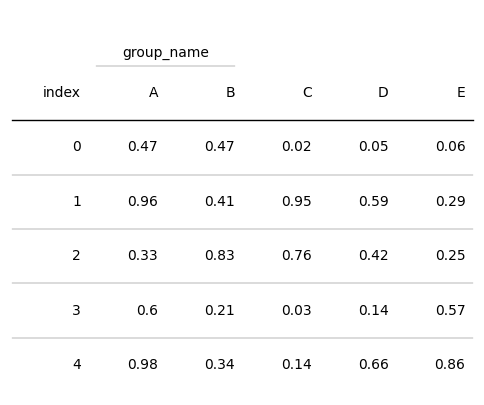

In [8]:
from plottable.cmap import normed_cmap
import matplotlib.cm


d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))

tab = Table(d, column_definitions=[ColumnDefinition(name="A", group="group_name"), 
                                   ColumnDefinition(name="B", group="group_name")])

plt.show()

## Providing a plot function

By providing a `plot_fn (Callable)` to a ColumnDefinition, plottable creates an axes on top of each Cell of this column, and creates plots based on each cell's value.

You can provide additional keywords to the plot function by passing a `plot_kw` dictionary to ColumnDefinition.

```python

    plot_fn: Callable = None
        A Callable that will take the cells value as input and create a subplot
        on top of each cell and plot onto them.
        To pass additional arguments to it, use plot_kw (see below).
    plot_kw: Dict[str, Any] = field(default_factory=dict)
        Additional keywords provided to plot_fn.
```

For available plotting functions have a look at the [Plots Notebook](../notebooks/plots.ipynb)

## Providing a border argument

By providing a `border (str)` argument, you can adjust whether left and right borders of all Columns cells are plotted.

border can be either "left" / "l", "right" / "r" or "both"

```{seealso}
The [Women's World Cup Example](../example_notebooks/wwc_example.ipynb) uses most of the available ColumnDefinition arguments.
```